# 配合課程影片 hmwu_StatR-04.2
# Exercise 4-2
18~19/21
ANOVA：兒童小圓藍細胞腫瘤資料 khan
請完成資料讀取，並依照4種疾病，繪製出兩兩比對的直方圖： khan_train

4種疾病：請參考 khan_train.classes 的levels

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
khan_train = pd.read_csv('./Data/khan_train.csv', index_col = 0)
khan_train_classes = pd.read_csv('./Data/khan_train_classes.csv', index_col = 0)
khan_annotation = pd.read_csv('./Data/khan_annotation.csv', index_col = 0)

In [3]:
def multhist(gene, disease1, disease2):    
    # 依照4種疾病將 khan_train 區分成四塊：
    ews = khan_train[khan_train.index == gene].iloc[:, 0:23]
    bl = khan_train[khan_train.index == gene].iloc[:, 23:31]
    nb = khan_train[khan_train.index == gene].iloc[:, 31:43]
    rms = khan_train[khan_train.index == gene].iloc[:, 43:64]
    
    # 建立各種疾病名稱大小寫對照的 dictionary：dict
    disease_dict = {"EWS":ews, "BL":bl, "NB":nb, "RMS":rms}    

    # 將被指定的2種疾病直方圖，疊合在一起比較：
    plt.figure(figsize = (8, 4))
    plt.title('Histograms of diseases')
    plt.hist(disease_dict[disease1])
    plt.hist(disease_dict[disease2])

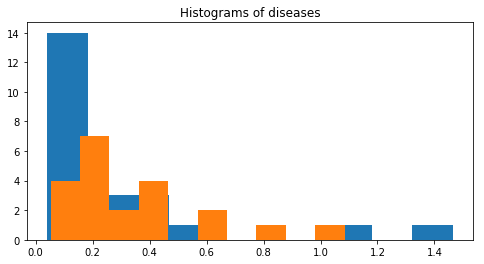

In [4]:
multhist(gene = 292522, disease1 = "EWS", disease2 = "RMS")

In [5]:
# 請計算每一種基因的 ANOVA p-value：
# Hint: khan_train 的每一列 (row) 對應到每一種基因
def Oneway_Anova(data):
    # 將每一筆 Gene 先轉換成 df：
    df = pd.DataFrame({"Value": data.values, "Type": khan_train_classes['x']})

    # 再把 df 做 One-Way Anova：
    model = ols("Value ~ Type", data = df).fit()
    aov_table = sm.stats.anova_lm(model, typ = 2)
    pvalue = aov_table["PR(>F)"][0]
    
    return pvalue

SRBCT_aov_p = pd.DataFrame(khan_train.apply(Oneway_Anova, axis = 1), columns = ["P_value"])
SRBCT_aov_p

,P_value
25725,1.536503e-07
193913,5.448115e-09
725454,3.942324e-06
297392,3.010673e-09
236282,4.139954e-20
298062,1.790888e-06
284001,1.040184e-02
283315,4.227303e-11
897177,1.109609e-07
755750,3.300068e-04


In [6]:
# 20/21
# 請依據 ANOVA p-values，選出由小至大排序下的 Top 5 genes：
# Hint: 取出 ranked_genes 前5個的 row index

order_p = SRBCT_aov_p.sort_values(by = ['P_value'])
ranked_genes = pd.concat([order_p, khan_annotation], axis = 1, join_axes = [order_p.index])
top5_gene_row_loc = ranked_genes.iloc[0:5].index.values
top5_gene_row_loc

array([770394, 236282, 812105, 183337, 814526])

In [7]:
# 請觀察 khan_train 中 Top 5 genes 的敘述統計狀況：
# Hint: top5_gene_row_loc 為 Top 5 genes 對應到 khan_train 的 row index
# Hint: class(khan_train) = "data.frame"
top5_gene = khan_train.iloc[pd.Index(khan_train.index).get_indexer(top5_gene_row_loc)]
print(top5_gene.apply(pd.Series.describe, axis = 1))


        count      mean       std     min       25%      50%       75%     max
770394   64.0  1.550814  1.634815  0.0669  0.336975  0.60570  2.817575  5.2958
236282   64.0  0.339798  0.302892  0.0364  0.155700  0.24115  0.356325  1.3896
812105   64.0  1.161914  1.225957  0.1011  0.324975  0.71830  1.554350  5.9451
183337   64.0  0.501317  0.690623  0.0223  0.127325  0.27010  0.510450  3.7478
814526   64.0  0.963984  0.763197  0.1804  0.429450  0.66775  1.362025  3.5809


In [8]:
# 請完成可針對每一種基因整理 ranked.genes 與繪製 boxplot 的自定義函數：
# Hint: gene 來自於 top5_gene_row_loc ，length(top5_gene_row_loc) = 5
def myplot(genes):
    fig, axs = plt.subplots(1, len(genes), sharey = True, figsize = (15, 4))

    for i, gene in enumerate(genes):
        title = ranked_genes.loc[gene, 'Symbol']       
        df = pd.DataFrame({"Value": khan_train.loc[gene, :].values, "Type": khan_train_classes['x']})
        df.boxplot(by = 'Type', ax = axs[i])
        axs[i].set_title(title)

    plt.suptitle("")
    plt.show()    

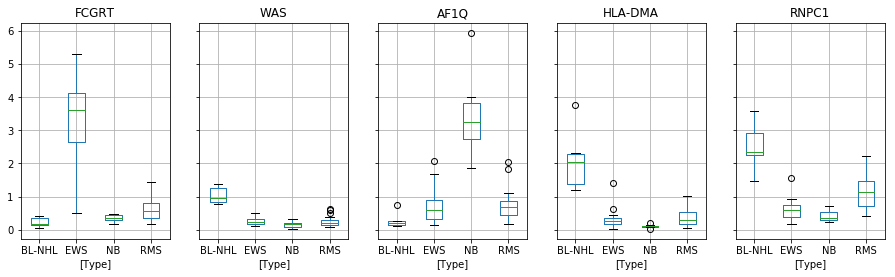

In [9]:
myplot(top5_gene_row_loc)

In [10]:
ranked_genes.iloc[0:5]

,P_value,CloneID,UGCluster,Symbol,LLID,UGRepAcc,LLRepProtAcc,Chromosome,Cytoband
770394,4.720366e-21,770394,Hs.111903,FCGRT,2217,AK074734,NP_004098,19,19q13.3
236282,4.139954e-20,236282,Hs.2157,WAS,7454,BM455138,NP_000368,X,Xp11.4-p11.21
812105,2.636711e-18,812105,Hs.75823,AF1Q,10962,BC022448,NP_006809,1,1q21
183337,8.459011e-18,183337,Hs.351279,HLA-DMA,3108,AK055186,NP_006111,6;10;5,6p21.3
814526,6.632142e-17,814526,Hs.236361,RNPC1,55544,NM_017495,NP_906270,20,20q13.31
